In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("./data/data.csv", sep=";")

In [ ]:
#Verifico si hay datos nulos
df.isnull().sum()
#Tengo una salida de 0 en todas las columnas, por lo tanto no se tienen datos nulos y se puede comenzar a trabajar con la data

In [ ]:
#Verifico tipo de datos para ver si se tiene que cambiar alguna columna a otro tipo de dato
df.info()

In [18]:
#Veo mis 5 primeros datos
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
#Grafica 1: Distribución de estudiantes que abandonan vs graduados

In [ ]:
percent_target = df.Target.value_counts(normalize=True)*100

Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64

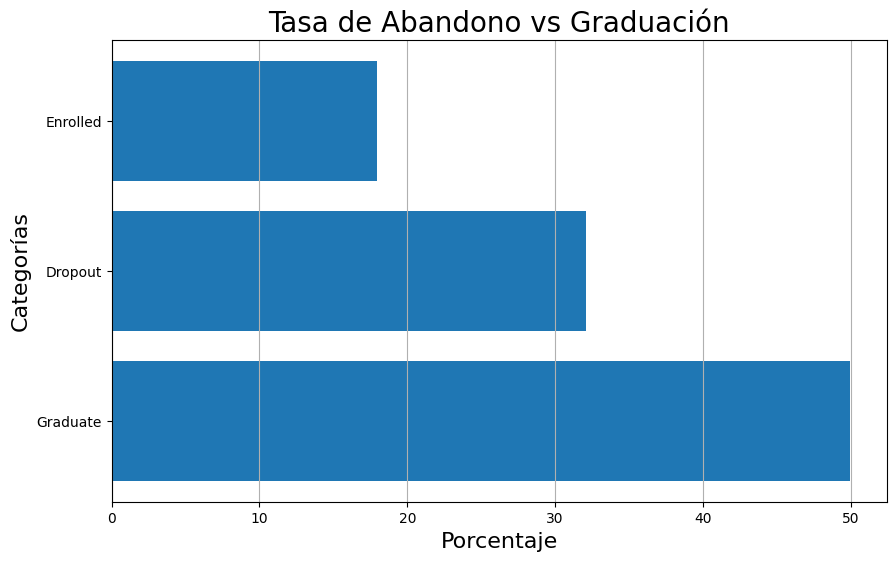

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(percent_target.index, percent_target.values)
plt.title("Tasa de Abandono vs Graduación", fontsize=20)
plt.xlabel("Porcentaje", fontsize=16)
plt.ylabel("Categorías", fontsize=16)
plt.grid(axis="x")


In [57]:
print(f"Análisis del gráfico")
print(f"Se obtuvieron los suientes porcentajes para las categorías de {percent_target}: ")
print("Se observó que la categoría predominante es 'Graduate'. Sin embargo, la proporción de estudiantes que abandonan alcanza un nivel considerablemente elevado. Este porcentaje constituye un indicador de riesgo institucional, lo que justifica la necesidad de identificar los factores que están influyendo en el abandono estudiantil.")



Análisis del gráfico
Se obtuvieron los suientes porcentajes para las categorías de Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64: 
Se observó que la categoría predominante es 'Graduate'. Sin embargo, la proporción de estudiantes que abandonan alcanza un nivel considerablemente elevado. Este porcentaje constituye un indicador de riesgo institucional, lo que justifica la necesidad de identificar los factores que están influyendo en el abandono estudiantil.


In [ ]:
#Dado que ya tengo el porcentaje, ahora necesito identificar las causas principales de que los estudiantes abandonen los estudios
#Primera idea: Verificar la cantidad de materias aprobadas en primer semestre para identificar si la cantidad de materias aprobadas determina este abandono

<Axes: xlabel='Target', ylabel='Curricular units 1st sem (approved)'>

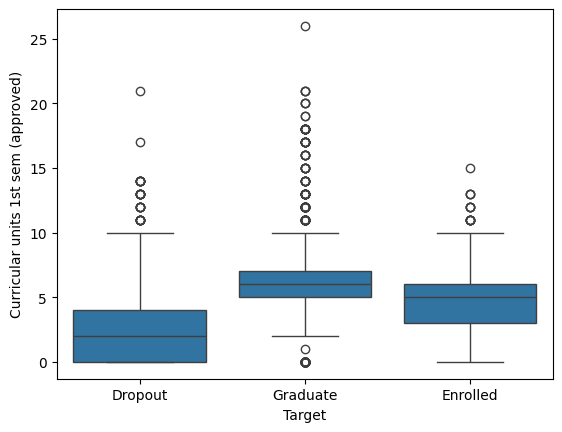

In [61]:
sns.boxplot(data=df, x="Target", y="Curricular units 1st sem (approved)")

In [88]:
#Hallar parámetros importantes (Media, Mediana , IQR)
parameter = df.groupby("Target")["Curricular units 1st sem (approved)"].describe()
print(parameter)
print(" ")
#Hallar el IQR para verificar la variabilidad
IQR = parameter["75%"] - parameter["25%"]
print(IQR) 

           count      mean       std  min  25%  50%  75%   max
Target                                                        
Dropout   1421.0  2.551724  2.857588  0.0  0.0  2.0  4.0  21.0
Enrolled   794.0  4.318640  2.289398  0.0  3.0  5.0  6.0  15.0
Graduate  2209.0  6.232232  2.583380  0.0  5.0  6.0  7.0  26.0
 
Target
Dropout     4.0
Enrolled    3.0
Graduate    2.0
dtype: float64


In [ ]:
'''
El grupo Dropout combina bajo rendimiento y alta variabilidad interna, lo que indica múltiples rutas hacia el abandono.

El grupo Graduate muestra alto rendimiento y baja variabilidad, lo que representa un perfil académico estable y exitoso.

Los estudiantes Enrolled se ubican en un punto intermedio en todos los indicadores: media, cuartiles e IQR.

En conjunto, estos resultados apoyan la hipótesis de que el desempeño académico temprano es un predictor crítico del riesgo de abandono.
'''

In [ ]:
#Segunda idea:

<Axes: xlabel='Target', ylabel='Curricular units 1st sem (grade)'>

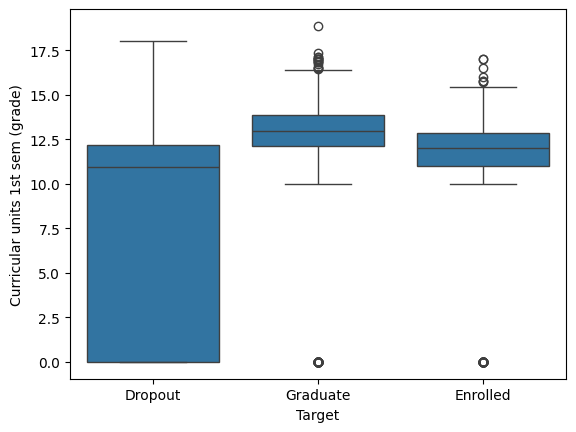

In [86]:
sns.boxplot(data=df, x="Target", y="Curricular units 1st sem (grade)")

In [ ]:
#Hallo parámetros importantes (Media, Mediana , IQR)
parameter = df.groupby("Target")["Curricular units 1st sem (grade)"].describe()
print(parameter)
print(" ")
#Hallo el IQR para verificar la variabilidad
print("Rango Intercuartil")
IQR = parameter["75%"] - parameter["25%"]
print(IQR) 

           count       mean       std  min        25%        50%        75%  \
Target                                                                        
Dropout   1421.0   7.256656  6.031120  0.0   0.000000  10.928571  12.200000   
Enrolled   794.0  11.125257  3.675084  0.0  11.000000  12.000000  12.857143   
Graduate  2209.0  12.643655  2.699027  0.0  12.121429  13.000000  13.857143   

             max  
Target            
Dropout   18.000  
Enrolled  17.000  
Graduate  18.875  
 
Rango Intercuartil
Target
Dropout     12.200000
Enrolled     1.857143
Graduate     1.735714
dtype: float64


In [ ]:
'''
Los resultados evidencian diferencias significativas en el rendimiento académico del primer semestre entre los tres grupos analizados. El grupo Dropout presenta tanto el promedio más bajo como la mayor variabilidad en las calificaciones (IQR = 12.20), lo que indica un comportamiento altamente heterogéneo donde coexisten estudiantes con desempeño crítico junto con otros de rendimiento moderado. Este patrón sugiere que el abandono no responde únicamente a bajos resultados académicos, sino a un conjunto más amplio de factores. En contraste, los grupos Enrolled y Graduate muestran distribuciones mucho más compactas (IQR = 1.86 y 1.73, respectivamente), lo que refleja un rendimiento estable y consistente. En particular, el grupo Graduate evidencia niveles de logro elevados y homogéneos desde el inicio del proceso formativo, configurando un perfil académico claramente asociado a la continuidad y culminación exitosa de los estudios. En conjunto, estos resultados respaldan la relevancia del desempeño temprano como un indicador crítico de riesgo institucional y de probabilidad de permanencia.
'''